# Decision Tree Implementation on Iris and MNIST Datasets

This code is an implementation of decision trees for two different datasets: the Iris dataset and the MNIST dataset. The decision trees are trained using three different criteria: Gini impurity, entropy, and log loss.This code provides a comprehensive analysis of decision tree performance on the given datasets under different splitting criteria. It evaluates the model's accuracy and other performance metrics, and it includes visualizations for better understanding.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
import sklearn.model_selection as skm
from sklearn import tree
from sklearn.metrics import roc_curve

# 1.DECISION TREE :IRIS DATASET

In [2]:
data=pd.read_csv("Iris.csv")
x = data.drop(["Species","Id"],axis=1)
y = data["Species"]

In [3]:
x_train,x_test,y_train,y_test = skm.train_test_split(x,y,test_size=0.2)
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [4]:
mapping = {}
index = 1
for class_ in set(data['Species']):
    mapping[class_] = index
    index+=1
ytest_no = []
for i in y_test:
    ytest_no.append(mapping[i])

# DECISION TREE USING CRITERIA:GINI

ACCURACY OF THE DECISION TREE : 96.66666666666667


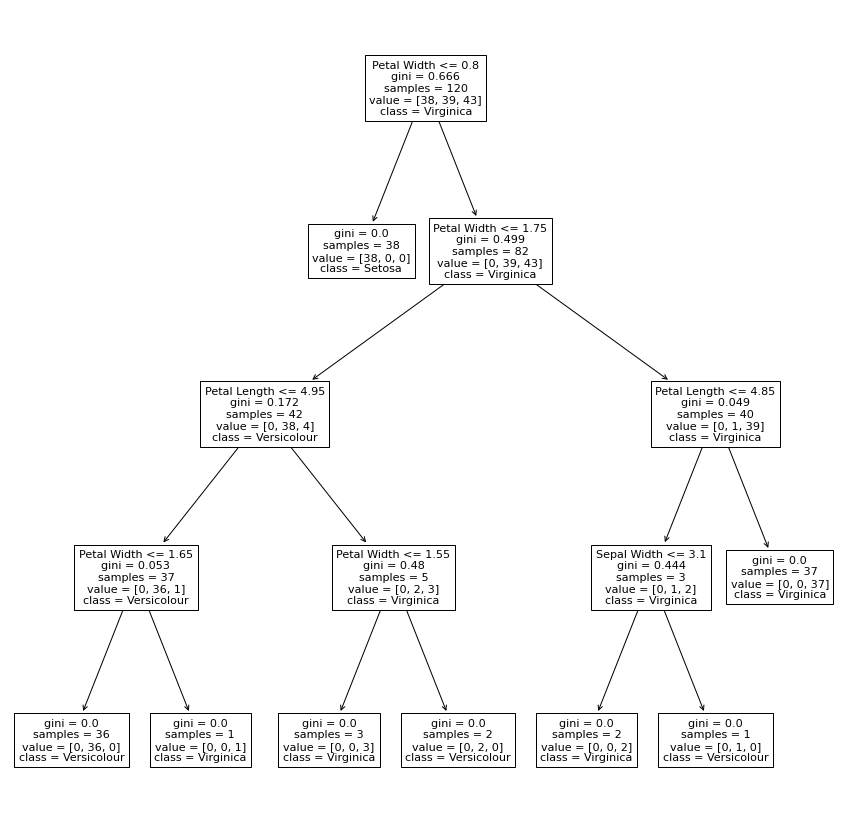

In [5]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred_reg= clf.predict(x_test)
plt.figure(figsize=(15,15))
tree.plot_tree(clf,feature_names = ["Sepal Length","Sepal Width","Petal Length","Petal Width"],class_names = ["Setosa","Versicolour","Virginica"])
a=(np.mean(y_pred_reg== np.array(y_test)))*100
print(f"ACCURACY OF THE DECISION TREE :",a)


Species          Iris-setosa  Iris-versicolor  Iris-virginica
row_0                                                        
Iris-setosa               12                0               0
Iris-versicolor            0               11               1
Iris-virginica             0                0               6
LABEL: Iris-setosa Accuracy: 1.0 Precision: 1.0 Recall 1.0 F1_Score 1.0
LABEL: Iris-versicolor Accuracy: 0.9666666666666667 Precision: 0.9166666666666666 Recall 1.0 F1_Score 0.9565217391304348
LABEL: Iris-virginica Accuracy: 0.9666666666666667 Precision: 1.0 Recall 0.8571428571428571 F1_Score 0.923076923076923


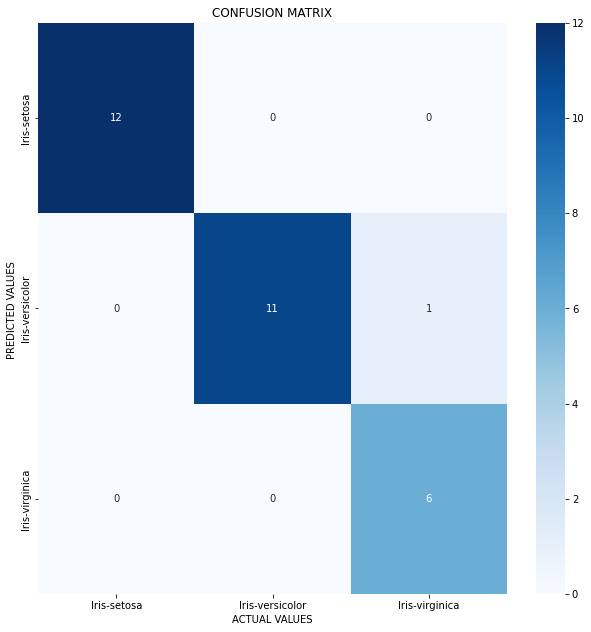

In [6]:
c=pd.crosstab(y_pred_reg,y_test)
print(c)
fig=plt.figure(figsize=(10.5,10.5))
a=sns.heatmap(c,annot=True,cmap='Blues')
a.set(xlabel ="ACTUAL VALUES", ylabel = "PREDICTED VALUES ", title ='CONFUSION MATRIX')
      
for i in range(c.shape[0]):
    TP=c.iloc[i,i]
    FP=c.iloc[i,:].sum()-TP
    FN=c.iloc[:,i].sum()-TP
    TN=c.sum().sum()-TP-FP-FN
    Accuracy=(TP+TN)/c.sum().sum()
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    F1_Score=(2*Precision*Recall)/(Precision+Recall)
    print(f"LABEL:",c.index[i],f"Accuracy:",Accuracy,f"Precision:",Precision,f"Recall",Recall,f"F1_Score",F1_Score)

C:\Users\najaf\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


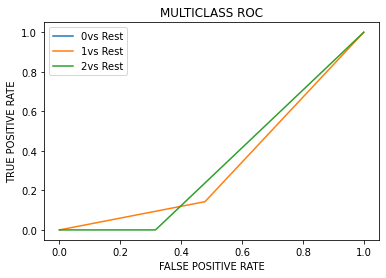

In [7]:
pred_prob=clf.predict_proba(x_test)
fpr={}
tpr={}
thresh={}

for i in range(c.shape[0]):
    fpr[i],tpr[i],thresh[i]=roc_curve(ytest_no ,pred_prob[:,i],pos_label=i)
for i in range (c.shape[0]):
    plt.plot(fpr[i],tpr[i],label=f"{i}vs Rest")
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("MULTICLASS ROC")
plt.legend()

# DECISION TREE USING CRITERIA:ENTROPY

ACCURACY OF THE DECISION TREE : 96.66666666666667


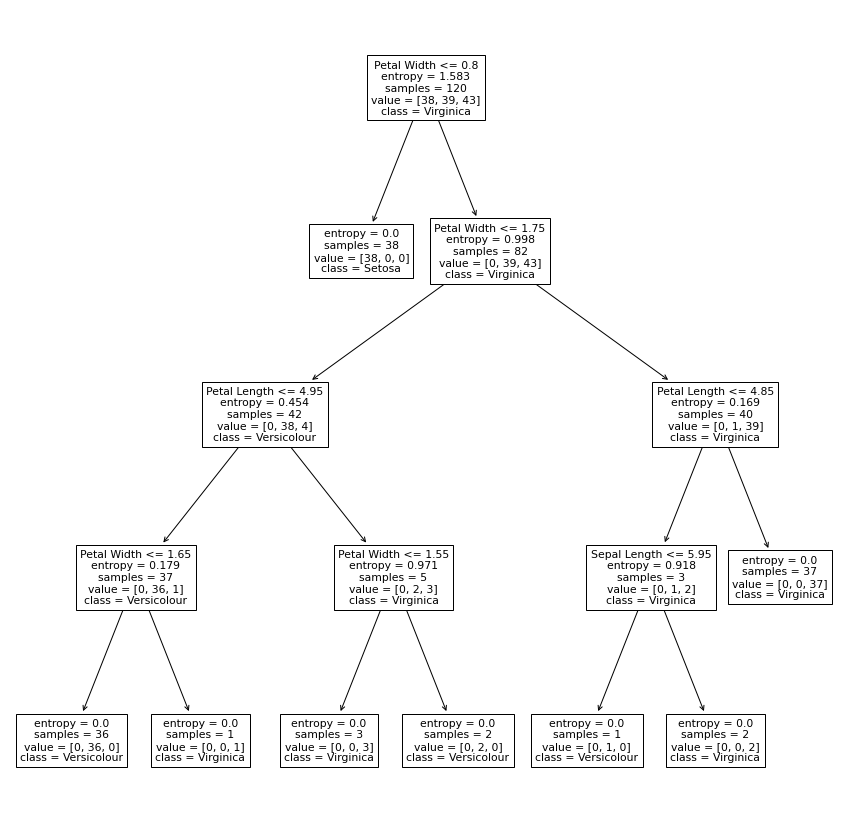

In [8]:
clf1=DecisionTreeClassifier(criterion='entropy')
clf1.fit(x_train,y_train)
y_pred_reg1= clf1.predict(x_test)
plt.figure(figsize=(15,15))
tree.plot_tree(clf1,feature_names = ["Sepal Length","Sepal Width","Petal Length","Petal Width"],class_names = ["Setosa","Versicolour","Virginica"])
a1=(np.mean(y_pred_reg1== np.array(y_test)))*100
print(f"ACCURACY OF THE DECISION TREE :",a1)

Species          Iris-setosa  Iris-versicolor  Iris-virginica
row_0                                                        
Iris-setosa               12                0               0
Iris-versicolor            0               11               1
Iris-virginica             0                0               6
LABEL: Iris-setosa Accuracy: 1.0 Precision: 1.0 Recall 1.0 F1_Score 1.0
LABEL: Iris-versicolor Accuracy: 0.9666666666666667 Precision: 0.9166666666666666 Recall 1.0 F1_Score 0.9565217391304348
LABEL: Iris-virginica Accuracy: 0.9666666666666667 Precision: 1.0 Recall 0.8571428571428571 F1_Score 0.923076923076923


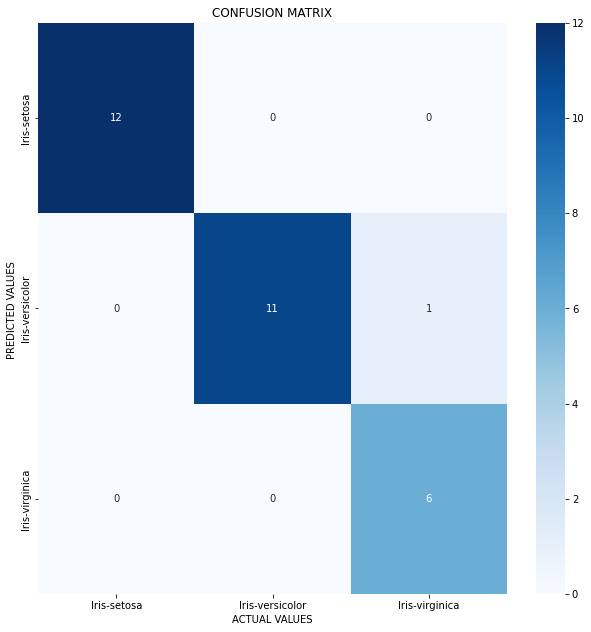

In [9]:
c1=pd.crosstab(y_pred_reg,y_test)
print(c1)
fig=plt.figure(figsize=(10.5,10.5))
a=sns.heatmap(c1,annot=True,cmap='Blues')
a.set(xlabel ="ACTUAL VALUES", ylabel = "PREDICTED VALUES ", title ='CONFUSION MATRIX')
      
for i in range(c1.shape[0]):
    TP=c1.iloc[i,i]
    FP=c1.iloc[i,:].sum()-TP
    FN=c1.iloc[:,i].sum()-TP
    TN=c1.sum().sum()-TP-FP-FN
    Accuracy=(TP+TN)/c1.sum().sum()
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    F1_Score=(2*Precision*Recall)/(Precision+Recall)
    print(f"LABEL:",c1.index[i],f"Accuracy:",Accuracy,f"Precision:",Precision,f"Recall",Recall,f"F1_Score",F1_Score)

C:\Users\najaf\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


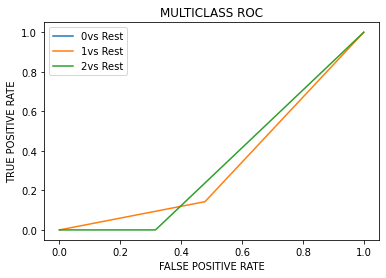

In [10]:
pred_prob=clf1.predict_proba(x_test)
fpr={}
tpr={}
thresh={}

for i in range(c1.shape[0]):
    fpr[i],tpr[i],thresh[i]=roc_curve(ytest_no,pred_prob[:,i],pos_label=i)
for i in range (c1.shape[0]):
    plt.plot(fpr[i],tpr[i],label=f"{i}vs Rest")
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("MULTICLASS ROC")
plt.legend()

# DECISION TREE USING CRITERIA:LOG_LOSS

ACCURACY OF THE DECISION TREE : 96.66666666666667


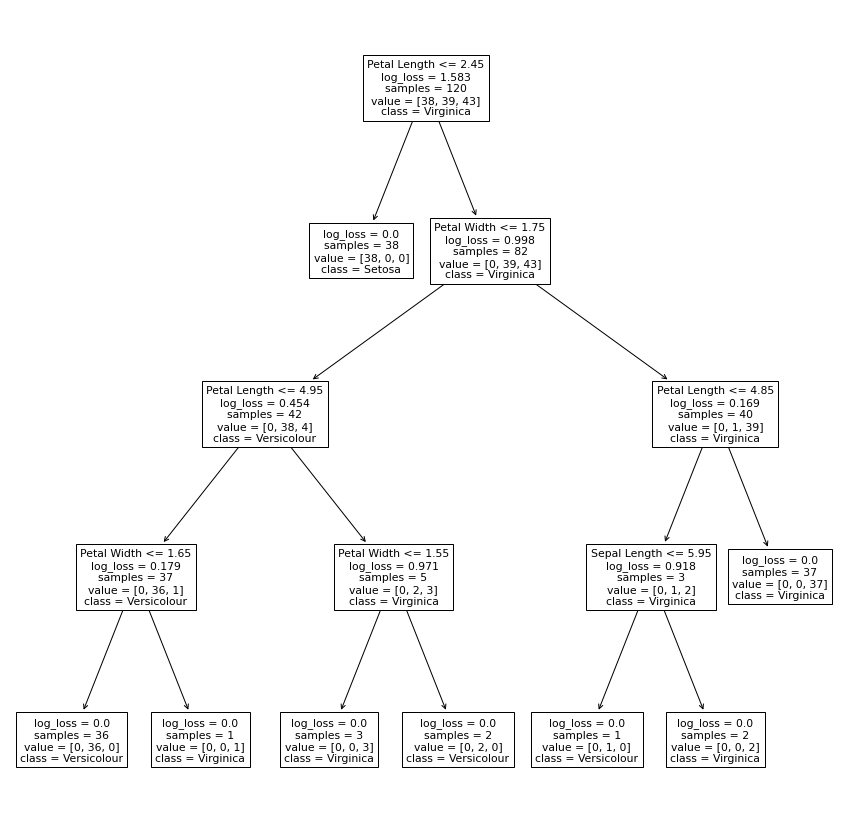

In [11]:
clf2=DecisionTreeClassifier(criterion='log_loss')
clf2.fit(x_train,y_train)
y_pred_reg2= clf2.predict(x_test)
plt.figure(figsize=(15,15))
tree.plot_tree(clf2,feature_names = ["Sepal Length","Sepal Width","Petal Length","Petal Width"],class_names = ["Setosa","Versicolour","Virginica"])
a=(np.mean(y_pred_reg2== np.array(y_test)))*100
print(f"ACCURACY OF THE DECISION TREE :",a)

Species          Iris-setosa  Iris-versicolor  Iris-virginica
row_0                                                        
Iris-setosa               12                0               0
Iris-versicolor            0               11               1
Iris-virginica             0                0               6
LABEL: Iris-setosa Accuracy: 1.0 Precision: 1.0 Recall 1.0 F1_Score 1.0
LABEL: Iris-versicolor Accuracy: 0.9666666666666667 Precision: 0.9166666666666666 Recall 1.0 F1_Score 0.9565217391304348
LABEL: Iris-virginica Accuracy: 0.9666666666666667 Precision: 1.0 Recall 0.8571428571428571 F1_Score 0.923076923076923


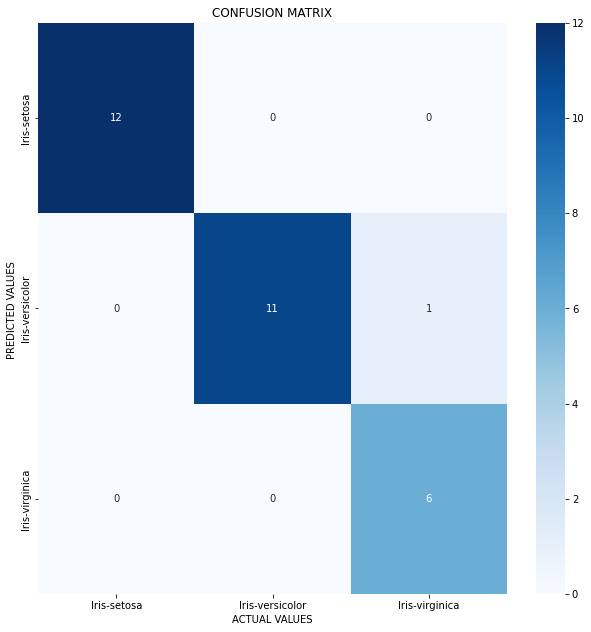

In [12]:
c2=pd.crosstab(y_pred_reg,y_test)
print(c2)
fig=plt.figure(figsize=(10.5,10.5))
a=sns.heatmap(c2,annot=True,cmap='Blues')
a.set(xlabel ="ACTUAL VALUES", ylabel = "PREDICTED VALUES ", title ='CONFUSION MATRIX')
      
for i in range(c2.shape[0]):
    TP=c2.iloc[i,i]
    FP=c2.iloc[i,:].sum()-TP
    FN=c2.iloc[:,i].sum()-TP
    TN=c2.sum().sum()-TP-FP-FN
    Accuracy=(TP+TN)/c2.sum().sum()
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    F1_Score=(2*Precision*Recall)/(Precision+Recall)
    print(f"LABEL:",c2.index[i],f"Accuracy:",Accuracy,f"Precision:",Precision,f"Recall",Recall,f"F1_Score",F1_Score)

C:\Users\najaf\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


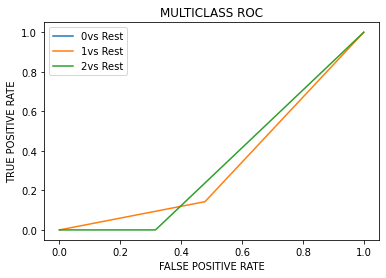

In [13]:
pred_prob=clf2.predict_proba(x_test)
fpr={}
tpr={}
thresh={}

for i in range(c2.shape[0]):
    fpr[i],tpr[i],thresh[i]=roc_curve(ytest_no,pred_prob[:,i],pos_label=i)
for i in range (c2.shape[0]):
    plt.plot(fpr[i],tpr[i],label=f"{i}vs Rest")
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("MULTICLASS ROC")
plt.legend()

# 2.DECISION TREE :MNIST

In [14]:
df=pd.read_csv("mnist_train.csv")
dt= pd.read_csv("mnist_test.csv")
x1_train=df.drop("label",axis=1)
y1_train=df["label"]
x1_test=dt.drop("label",axis=1)
y1_test=dt["label"]

# DECISION TREE USING CRITERIA:GINI

In [15]:
clf4 = DecisionTreeClassifier()
clf4 = clf4.fit(x1_train,y1_train)
y1_pred_reg= clf4.predict(x1_test)
a1=(np.mean(y1_pred_reg== np.array(y1_test)))*100
print(f"ACCURACY OF THE DECISION TREE :",a1)

ACCURACY OF THE DECISION TREE : 87.83999999999999


label    0     1    2    3    4    5    6    7    8    9
row_0                                                   
0      916     0   12    7    7   15   17    2   11   17
1        1  1097    8    5    6    8    5   12   12    3
2        8     9  884   31   10    5   11   26   25    8
3        6     4   35  858    1   41    5   16   31   21
4        7     1   10    7  861    7   20    9   26   43
5       10     4   13   43    6  747   22    3   32    7
6       11     7   15    6   19   24  852    4   16    8
7        4     3   22   10   10    5    0  926    9   19
8        8     9   22   22   20   22   25   11  786   26
9        9     1   11   21   42   18    1   19   26  857
LABEL: 0 Accuracy: 0.9848 Precision: 0.9123505976095617 Recall 0.9346938775510204 F1_Score 0.9233870967741935
LABEL: 1 Accuracy: 0.9902 Precision: 0.9481417458945549 Recall 0.9665198237885463 F1_Score 0.9572425828970331
LABEL: 2 Accuracy: 0.9719 Precision: 0.8692232055063913 Recall 0.8565891472868217 F1_Score 0.862

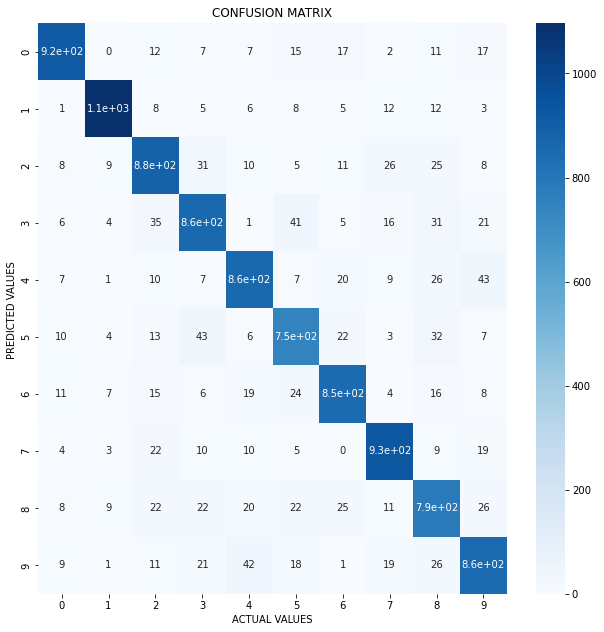

In [16]:
c3=pd.crosstab(y1_pred_reg,y1_test)
print(c3)
fig=plt.figure(figsize=(10.5,10.5))
a=sns.heatmap(c3,annot=True,cmap='Blues')
a.set(xlabel ="ACTUAL VALUES", ylabel = "PREDICTED VALUES ", title ='CONFUSION MATRIX')
for i in range(c3.shape[0]):
    TP=c3.iloc[i,i]
    FP=c3.iloc[i,:].sum()-TP
    FN=c3.iloc[:,i].sum()-TP
    TN=c3.sum().sum()-TP-FP-FN
    Accuracy=(TP+TN)/c3.sum().sum()
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    F1_Score=(2*Precision*Recall)/(Precision+Recall)
    print(f"LABEL:",c3.index[i],f"Accuracy:",Accuracy,f"Precision:",Precision,f"Recall",Recall,f"F1_Score",F1_Score)

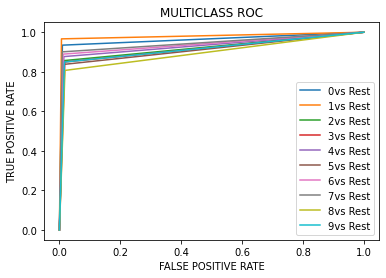

In [17]:
pred_prob=clf4.predict_proba(x1_test)
fpr={}
tpr={}
thresh={}

for i in range(c3.shape[0]):
    fpr[i],tpr[i],thresh[i]=roc_curve(y1_test,pred_prob[:,i],pos_label=i)
for i in range (c3.shape[0]):
    plt.plot(fpr[i],tpr[i],label=f"{i}vs Rest")
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("MULTICLASS ROC")
plt.legend()

# DECISION TREE USING CRITERIA:ENTROPY

In [18]:
clf5=DecisionTreeClassifier(criterion='entropy')
clf5.fit(x1_train,y1_train)
y1_pred_reg1= clf5.predict(x1_test)
a2=(np.mean(y1_pred_reg1== np.array(y1_test)))*100
print(f"ACCURACY OF THE DECISION TREE :",a2)

ACCURACY OF THE DECISION TREE : 88.29


label    0     1    2    3    4    5    6    7    8    9
row_0                                                   
0      916     0   12    7    7   15   17    2   11   17
1        1  1097    8    5    6    8    5   12   12    3
2        8     9  884   31   10    5   11   26   25    8
3        6     4   35  858    1   41    5   16   31   21
4        7     1   10    7  861    7   20    9   26   43
5       10     4   13   43    6  747   22    3   32    7
6       11     7   15    6   19   24  852    4   16    8
7        4     3   22   10   10    5    0  926    9   19
8        8     9   22   22   20   22   25   11  786   26
9        9     1   11   21   42   18    1   19   26  857
LABEL: 0 Accuracy: 0.9848 Precision: 0.9123505976095617 Recall 0.9346938775510204 F1_Score 0.9233870967741935
LABEL: 1 Accuracy: 0.9902 Precision: 0.9481417458945549 Recall 0.9665198237885463 F1_Score 0.9572425828970331
LABEL: 2 Accuracy: 0.9719 Precision: 0.8692232055063913 Recall 0.8565891472868217 F1_Score 0.862

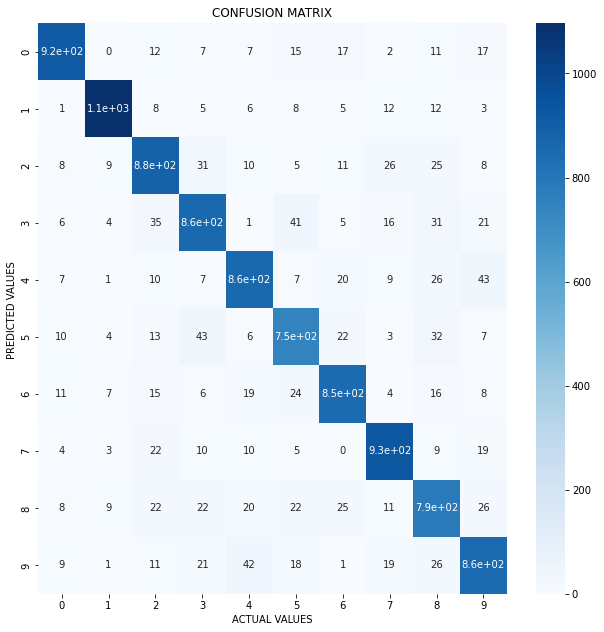

In [19]:
c4=pd.crosstab(y1_pred_reg,y1_test)
print(c4)
fig=plt.figure(figsize=(10.5,10.5))
a=sns.heatmap(c4,annot=True,cmap='Blues')
a.set(xlabel ="ACTUAL VALUES", ylabel = "PREDICTED VALUES ", title ='CONFUSION MATRIX')
for i in range(c4.shape[0]):
    TP=c4.iloc[i,i]
    FP=c4.iloc[i,:].sum()-TP
    FN=c4.iloc[:,i].sum()-TP
    TN=c4.sum().sum()-TP-FP-FN
    Accuracy=(TP+TN)/c4.sum().sum()
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    F1_Score=(2*Precision*Recall)/(Precision+Recall)
    print(f"LABEL:",c4.index[i],f"Accuracy:",Accuracy,f"Precision:",Precision,f"Recall",Recall,f"F1_Score",F1_Score)

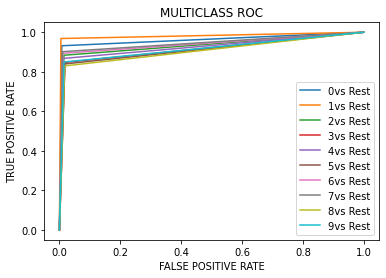

In [20]:
pred_prob=clf5.predict_proba(x1_test)
fpr={}
tpr={}
thresh={}

for i in range(c4.shape[0]):
    fpr[i],tpr[i],thresh[i]=roc_curve(y1_test,pred_prob[:,i],pos_label=i)
for i in range (c4.shape[0]):
    plt.plot(fpr[i],tpr[i],label=f"{i}vs Rest")
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("MULTICLASS ROC")
plt.legend()

# DECISION TREE USING CRITERIA:LOG_LOSS

In [21]:
clf6=DecisionTreeClassifier(criterion='log_loss')
clf6.fit(x1_train,y1_train)
y1_pred_reg2= clf6.predict(x1_test)
a3=(np.mean(y1_pred_reg2== np.array(y1_test)))*100
print(f"ACCURACY OF THE DECISION TREE :",a3)

ACCURACY OF THE DECISION TREE : 88.75999999999999


label    0     1    2    3    4    5    6    7    8    9
row_0                                                   
0      916     0   12    7    7   15   17    2   11   17
1        1  1097    8    5    6    8    5   12   12    3
2        8     9  884   31   10    5   11   26   25    8
3        6     4   35  858    1   41    5   16   31   21
4        7     1   10    7  861    7   20    9   26   43
5       10     4   13   43    6  747   22    3   32    7
6       11     7   15    6   19   24  852    4   16    8
7        4     3   22   10   10    5    0  926    9   19
8        8     9   22   22   20   22   25   11  786   26
9        9     1   11   21   42   18    1   19   26  857
LABEL: 0 Accuracy: 0.9848 Precision: 0.9123505976095617 Recall 0.9346938775510204 F1_Score 0.9233870967741935
LABEL: 1 Accuracy: 0.9902 Precision: 0.9481417458945549 Recall 0.9665198237885463 F1_Score 0.9572425828970331
LABEL: 2 Accuracy: 0.9719 Precision: 0.8692232055063913 Recall 0.8565891472868217 F1_Score 0.862

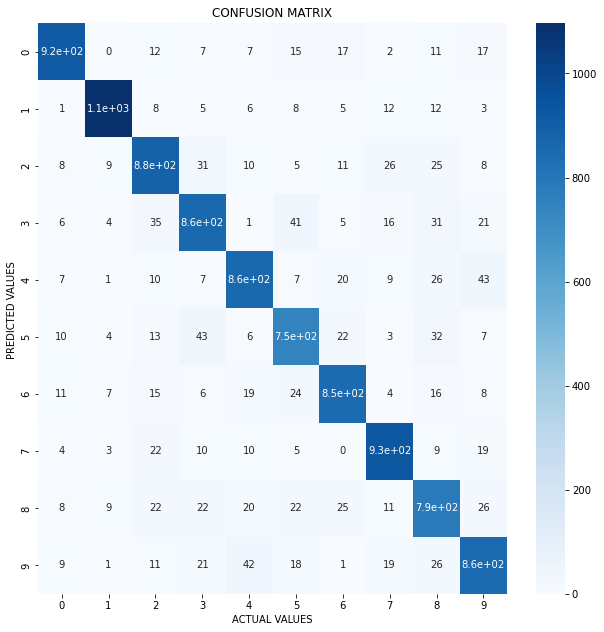

In [22]:
c5=pd.crosstab(y1_pred_reg,y1_test)
print(c5)
fig=plt.figure(figsize=(10.5,10.5))
a=sns.heatmap(c5,annot=True,cmap='Blues')
a.set(xlabel ="ACTUAL VALUES", ylabel = "PREDICTED VALUES ", title ='CONFUSION MATRIX')
for i in range(c5.shape[0]):
    TP=c5.iloc[i,i]
    FP=c5.iloc[i,:].sum()-TP
    FN=c5.iloc[:,i].sum()-TP
    TN=c5.sum().sum()-TP-FP-FN
    Accuracy=(TP+TN)/c5.sum().sum()
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    F1_Score=(2*Precision*Recall)/(Precision+Recall)
    print(f"LABEL:",c5.index[i],f"Accuracy:",Accuracy,f"Precision:",Precision,f"Recall",Recall,f"F1_Score",F1_Score)

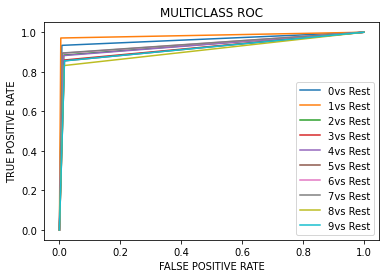

In [23]:
pred_prob=clf6.predict_proba(x1_test)
fpr={}
tpr={}
thresh={}

for i in range(c5.shape[0]):
    fpr[i],tpr[i],thresh[i]=roc_curve(y1_test,pred_prob[:,i],pos_label=i)
for i in range (c5.shape[0]):
    plt.plot(fpr[i],tpr[i],label=f"{i}vs Rest")
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("MULTICLASS ROC")
plt.legend()